# **Experiment 2 - Classification with AdaBoost Classifier (cont'd)**


In this notebook, we will load the preprocessed data, train the model with AdaBoost Classifier, try hyperparameter tuning, assess model performance and export the submission file. 

The steps include:
   
   1. Load the Preprocessed Dataset
   2. Train AdaBoost Classifier model
   3. Model Evaluation
   4. Hyperparameter Tuning
   5. Export Submission File

# 1. Load the Preprocessed Dataset

In [80]:
# Launch magic commands to automatically reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
# Import the pandas, numpy packages and dump from joblib
import pandas as pd
import numpy as np

In [84]:
# Load the saved sets from data/processed
X_train = pd.read_csv('../data/processed/X_train_wk2.csv')
X_val   = pd.read_csv('../data/processed/X_val_wk2.csv'  )
X_test  = pd.read_csv('../data/processed/X_test_wk2.csv' )
y_train = pd.read_csv('../data/processed/y_train_wk2.csv')
y_val   = pd.read_csv('../data/processed/y_val_wk2.csv'  )

# 2. Train AdaBoost Classifier model

In [85]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
# Import AdaBoostClassifier method from scikitlearn
from sklearn.ensemble import AdaBoostClassifier

In [87]:
# Instantiate the AdaBoostRegressor method with randon_state=0, n_estimators=100. Save it as a variable called adaboost
adaboost = AdaBoostClassifier(random_state=0, n_estimators=100)

In [88]:
# Fit the training datasets into the adaboost model
adaboost.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(n_estimators=100, random_state=0)

# 3. Model Evaluation

In [90]:
# Prediction probability on the training, validation and testing datasets
preds_proba_train = adaboost.predict_proba(X_train) 
preds_proba_val = adaboost.predict_proba(X_val) 
preds_proba_test = adaboost.predict_proba(X_test)

In [91]:
# Keep the prediction probabilities for the drafted variable
preds_proba_train = preds_proba_train[:, 1]
preds_proba_val = preds_proba_val[:, 1]
preds_proba_test = preds_proba_test[:, 1]

In [92]:
# Import the roc_auc_score from scikit-learn to evaluate the model performance
from sklearn.metrics import roc_curve, roc_auc_score

In [93]:
# Calculate the AUROC score of the training dataset
reg_auc_train = roc_auc_score(y_train, preds_proba_train)
reg_auc_train

0.9965191666385046

In [94]:
# Calculate the AUROC score of the validation dataset
reg_auc_val = roc_auc_score(y_val, preds_proba_val)
reg_auc_val

0.9958602138308584

As the AUROC scores on training and validation datasets suggest, we can see that there is overfitting issue with the Logistic Regression model. Hence we will try hyperparameter tuning to see if it can solve the overfitting problem.

In [95]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


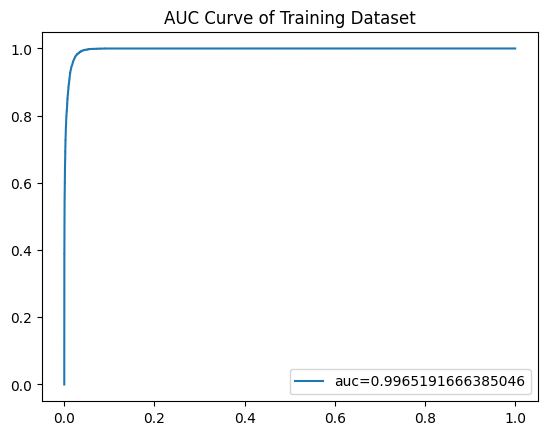

In [96]:
# Plot the AUC Curve on training dataset
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_train,  preds_proba_train)

plt.plot(fpr,tpr,label="auc="+str(reg_auc_train))
plt.legend(loc=4)
plt.title("AUC Curve of Training Dataset")
plt.show()

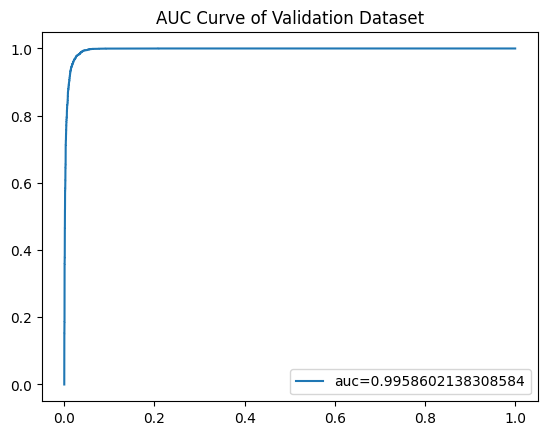

In [97]:
# Plot the AUC Curve on validation dataset
fpr, tpr, _ = metrics.roc_curve(y_val,  preds_proba_val)

plt.plot(fpr,tpr,label="auc="+str(reg_auc_val))
plt.legend(loc=4)
plt.title("AUC Curve of Validation Dataset")
plt.show()

# 4. Hyperparameter Tuning

In [106]:
# Instantiate the adaboost method with hyperparameter random_state=0, n_estimators=100, learning_rate=0.05. Save it as a variable called adaboost_lr
adaboost_lr = AdaBoostClassifier(random_state=0, n_estimators=100, learning_rate=0.05) 

In [107]:
# Fit the training datasets into the adaboost_lr model
adaboost_lr.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(learning_rate=0.05, n_estimators=100, random_state=0)

In [108]:
# Calculate the AUROC score of the training dataset
reg_auc_train = roc_auc_score(y_train, preds_proba_train)
reg_auc_train

0.9965191666385046

In [109]:
# Calculate the AUROC score of the validation dataset
reg_auc_val = roc_auc_score(y_val, preds_proba_val)
reg_auc_val

0.9958602138308584

Even though we tried different hyperpameter tuning options, the AUROC scores on the training and validation datasets remained unchanged. Therefore, we will keep the model svc as the the best that we could find so far.

# 5. Export Submission File

In [110]:
# Open the testing dataset and save as df_test_cleaned
df_test_cleaned = pd.read_csv('../data/raw/advmla-2023-spring/test.csv')

In [111]:
# Split the column player_id from the df_test_cleaned and save as a variable called player_id
player_id = df_test_cleaned.pop('player_id')

In [112]:
# Create a dataframe containing 2 columns: player_id and preds_proba_test. Save as submission
submission = pd.DataFrame({'player_id': player_id, 'drafted': list(preds_proba_test)})
submission

,player_id,drafted
0,cf302b4d-84f7-4124-a25d-a75eed31978b,0.464215
1,f91837cd-4f49-4b70-963d-aeb82c6ce3da,0.369852
2,53ec2a29-1e7d-4c6d-86d7-d60d02af8916,0.476085
3,32402798-471c-4a54-8cb4-29cd95199014,0.475620
4,73b960f9-27b8-4431-9d23-a760e9bbc360,0.495436
...,...,...
4965,a25ee55f-02a3-4f8e-8194-a5f427e14e7c,0.484750
4966,d0d9f45e-7b01-44b3-8d40-514ec338611d,0.459789
4967,f8df22c4-1602-4fab-896d-8820951aae2f,0.470899
4968,b791c69a-f769-4163-afda-051a6fd20a9d,0.470899


In [113]:
# Save the submission dataframe to the `notebook` folder as a csv file
submission.to_csv('../reports/submission_wk2.csv', index=False)